# CS 412 - Machine Learning
**İpek Akkuş - 30800**

# **HW1 - Part 2**


**2.1 - Dataset**

Downloading Fashion-MNIST Dataset to be able to work on.

This step also contains splitting the training dataset for development and validation, as well.

In [4]:
import numpy as np
from keras.datasets import fashion_mnist

In [5]:
# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
print('X_train shape:', X_train.shape, ', y_train shape:', y_train.shape)
print('X_test shape: ', X_test.shape, ', y_test shape: ', y_test.shape)

X_train shape: (60000, 28, 28) , y_train shape: (60000,)
X_test shape:  (10000, 28, 28) , y_test shape:  (10000,)


In [8]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 42

# Split the training data into development and validation sets
X_dev, X_val, y_dev, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed, shuffle=True)

# Check the shapes of the new datasets
print("X_dev shape:", X_dev.shape, ", y_dev shape:", y_dev.shape)
print("X_val shape:", X_val.shape, ", y_val shape:", y_val.shape)

X_dev shape: (48000, 28, 28) , y_dev shape: (48000,)
X_val shape: (12000, 28, 28) , y_val shape: (12000,)


**2.2 - Best K in k-NN**



Reshape/Flatten the dataset from 3D arrays into 2D arrays

In [9]:
# Flatten the development and validation sets
X_dev_flattened = X_dev.reshape(X_dev.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

# Check the shapes after flattening
print("X_dev_flattened shape:", X_dev_flattened.shape)
print("X_val_flattened shape:", X_val_flattened.shape)

X_dev_flattened shape: (48000, 784)
X_val_flattened shape: (12000, 784)


Build k-NN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Train and evaluate k-NN classifiers for each given k values and plot them


In [11]:
# Define the list of k values to experiment with
k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]

# Initialize lists to store accuracy scores
accuracy_scores = []

# Train and evaluate k-NN classifiers for each k value
for k in k_values:
    # Initialize the k-NN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the development set
    knn.fit(X_dev_flattened, y_dev)

    # Make predictions on the validation set
    y_val_pred = knn.predict(X_val_flattened)

    # Calculate the accuracy on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)

    # Append the accuracy to the list
    accuracy_scores.append(accuracy)

    # Print the accuracy for the current k value
    print(f'Accuracy for k={k}: {accuracy}')


Accuracy for k=1: 0.8486666666666667
Accuracy for k=3: 0.8524166666666667
Accuracy for k=7: 0.8539166666666667
Accuracy for k=12: 0.84825
Accuracy for k=20: 0.8426666666666667
Accuracy for k=30: 0.8345833333333333
Accuracy for k=50: 0.82425
Accuracy for k=75: 0.8159166666666666
Accuracy for k=100: 0.8083333333333333


In [13]:
# Find the optimal k value and its corresponding accuracy
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
optimal_accuracy = max(accuracy_scores)
print(f'Optimal k: {optimal_k}, Optimal Accuracy: {optimal_accuracy}')

Optimal k: 7, Optimal Accuracy: 0.8539166666666667


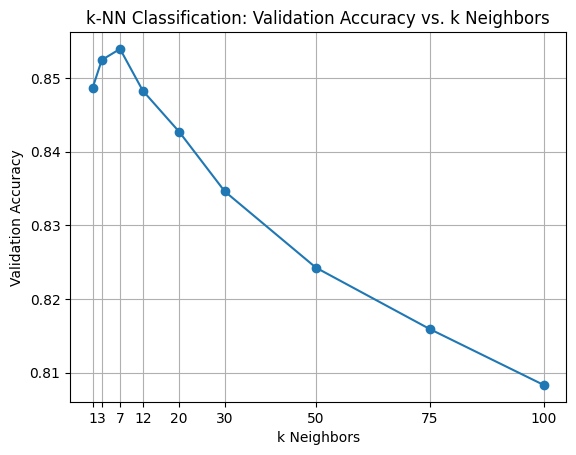

In [14]:
# Plot the validation accuracy for different k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k Neighbors')
plt.ylabel('Validation Accuracy')
plt.title('k-NN Classification: Validation Accuracy vs. k Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Retrain k-NN classifier by combining the training and validation sets for the optimal k value found in the previous step

In [15]:
# Combine the development and validation sets
X_train_combined = np.concatenate((X_dev, X_val), axis=0)
y_train_combined = np.concatenate((y_dev, y_val), axis=0)

# Flatten the combined training set
X_train_combined_flattened = X_train_combined.reshape(X_train_combined.shape[0], -1)

# Flatten the test set
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Retrain the classifier with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_combined_flattened, y_train_combined)

# Make predictions on the test set
y_test_pred = knn_optimal.predict(X_test_flattened)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.854


Plot the confusion matrix for the final model’s predictions across the ten classes.

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

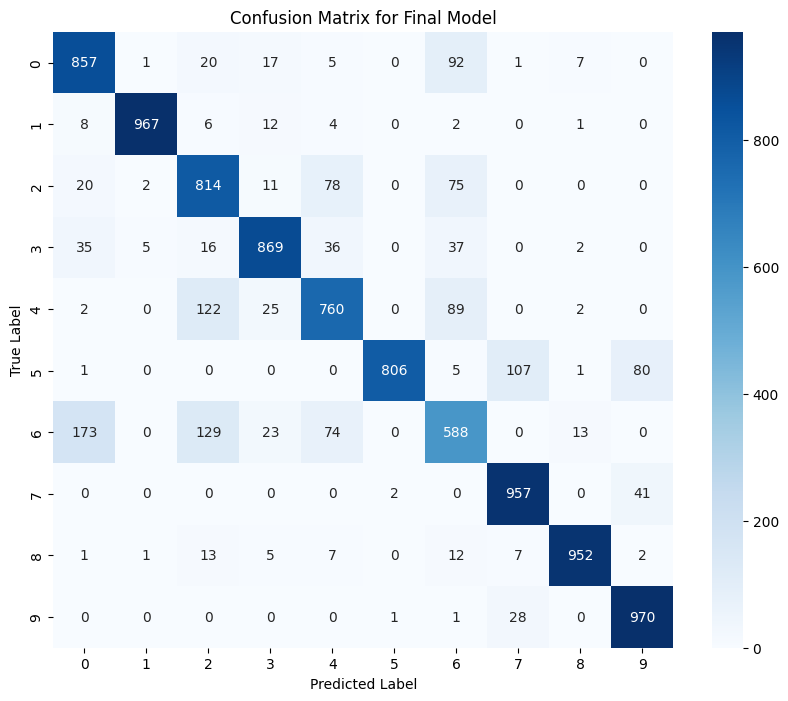

In [17]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in range(10)], yticklabels=[i for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Final Model')
plt.show()

# Analysis and comments on confusion matrix

1. **Diagonal Dominance:**

  - The diagonal cells, representing correct classifications, have higher values compared to the off-diagonal cells. This suggests that the k-NN classifier generally performs well.

2. **Common Misclassifications:**

  - Class 6 seems to have the highest number of misclassifications. There is a significant number of instances where class 6 is predicted as class 0. This suggests that there might be some similarities between the features (e.g., clothing articles) of these two classes that the k-NN classifier is picking up on.
  - Similarly, class 4 is often misclassified as class 2, and class 2 as class 4. The features of these classes might be closely related, leading to confusion for the classifier.

3. **Classes with Highest Correct Classifications:**

  - Class 1 and class 9 have relatively high correct classification rates, indicating that their features might be distinct compared to other classes.

4. **Potential for Improvement:**

  - For the classes that have a significant number of misclassifications, such as 2, 4, and 6, further feature engineering, more complex models, or even a hierarchical classification approach might improve classification accuracy.

5. **Symmetrical Misclassifications:**

  - There are pairs of classes that are commonly mistaken for one another, such as (2, 4) and (0, 6). These symmetrical patterns can be useful in understanding which classes are similar to each other and may benefit from additional discriminative features or data augmentation to improve classification.

These insights are useful for understanding the strengths and weaknesses of the k-NN classifier on this dataset. It might also suggest ways to further refine the classifier or preprocess the data.
